# "2019 January Portfolio BackTest"
> "2019 January portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [2]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [3]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20204dayreturnpred2019train60K.csv')

In [4]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [5]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [6]:
#hide
df_testp=df_testp.loc[df_testp.Date<=20200201].copy().reset_index()

**Long-Short Portfolio**

In [7]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [8]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [9]:
#hide_input
df_testp.head()

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,0,ACCESS-POWER INC,20200102,ACCR,-1.0,1.0,0.132249,0.350427,0.517323,1.294118,...,0.941176,1.208791,1.070588,0.909091,0.800000,1.000000,1.000000,1.000000,1.000000,0
1,1,HURCO COMPANIES INC,20200103,HURC,-1.0,1.0,0.168387,0.326927,0.504685,0.960601,...,0.938209,0.984316,0.975907,0.991148,0.985412,1.070588,1.294118,1.176471,0.941176,1
2,2,CAN CAL RESOURCES LTD,20200107,CCRE,0.0,1.0,0.131432,0.371087,0.497481,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.044795,1.243131,1.120115,0.883020,2
3,3,Chun Can Capital Group,20200107,CNCN,-1.0,1.0,0.099893,0.358748,0.541359,1.000000,...,0.600000,1.000000,1.000000,1.000000,0.600000,1.044795,1.243131,1.120115,0.883020,3
4,4,URSTADT BIDDLE PROPERTIES INC,20200110,UBA,1.0,1.0,0.093453,0.396699,0.509847,1.007970,...,1.012584,0.997509,1.010487,1.001248,1.003325,1.044795,1.243131,1.120115,0.529812,4


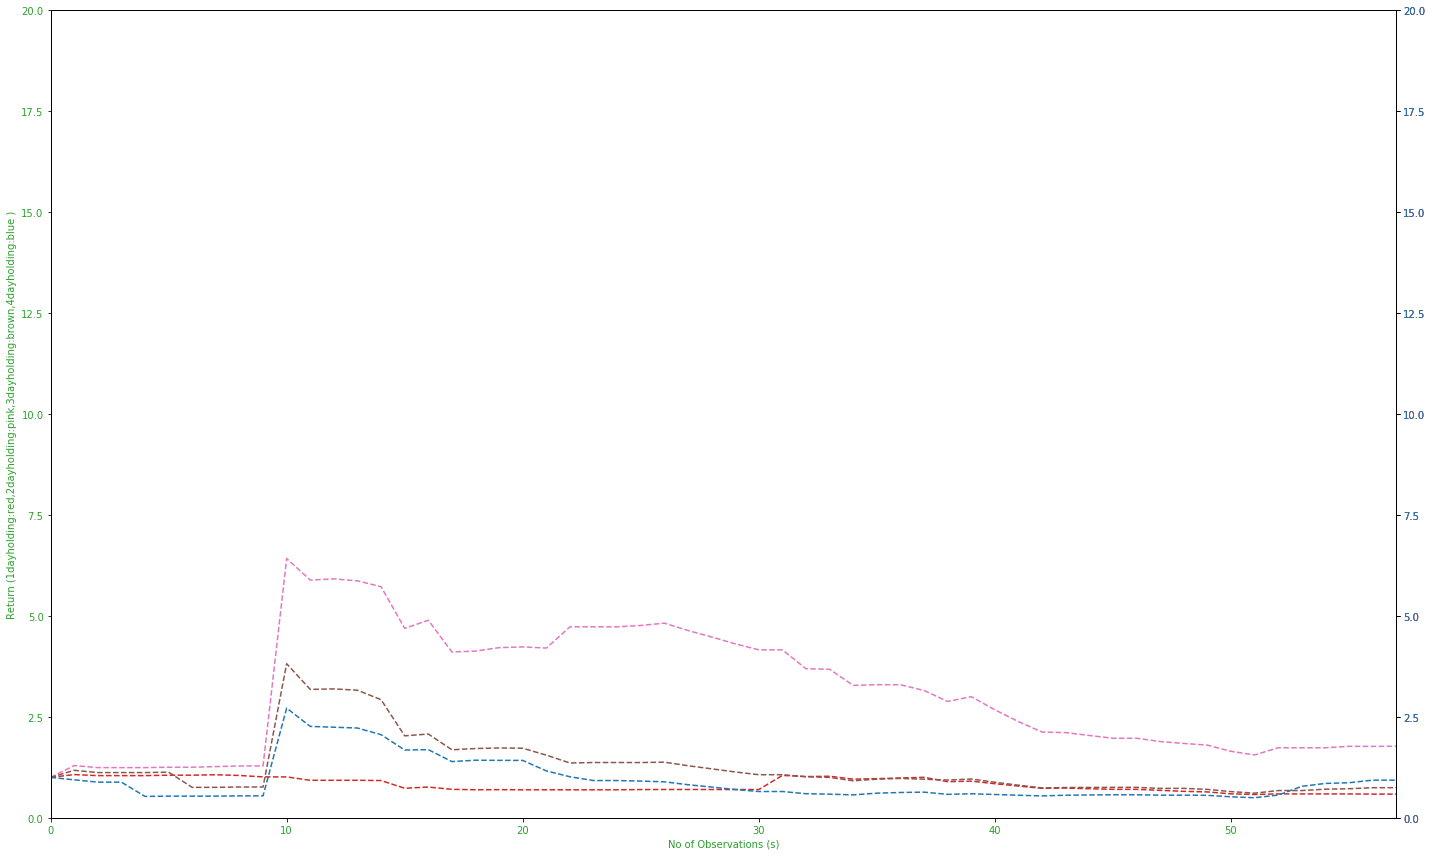

In [25]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,20
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [11]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='prof1.0',ascending=False).reset_index()


In [12]:
#hide_input
df_long['indexx']=range(len(df_long))

In [13]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [14]:
#hide_input
df_long.head()

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,29,29,CARNIVAL PLC,20200128,CUK,-1.0,1.0,0.128598,0.261621,0.609781,...,0.929780,0.965896,0.999314,0.973934,0.989051,1.000000,1.000000,1.000000,1.000000,0
1,28,28,CARNIVAL CORP,20200128,CCL,-1.0,1.0,0.128598,0.261621,0.609781,...,0.919355,0.962366,1.000000,0.972737,0.982081,0.999314,0.965233,0.940073,0.929780,1
2,27,27,CARNIVAL PLC,20200128,CUK,-1.0,1.0,0.128598,0.261621,0.609781,...,0.929780,0.965896,0.999314,0.973934,0.989051,0.999314,0.928907,0.880030,0.854798,2
3,26,26,CARNIVAL CORP,20200128,CCL,-1.0,1.0,0.128598,0.261621,0.609781,...,0.919355,0.962366,1.000000,0.972737,0.982081,0.998628,0.896612,0.827292,0.794775,3
4,24,24,LENNAR CORP /NEW/,20200127,LEN,-1.0,1.0,0.106330,0.317953,0.575717,...,0.986179,1.000000,1.007282,0.992328,0.986619,0.998628,0.862869,0.774452,0.730680,4


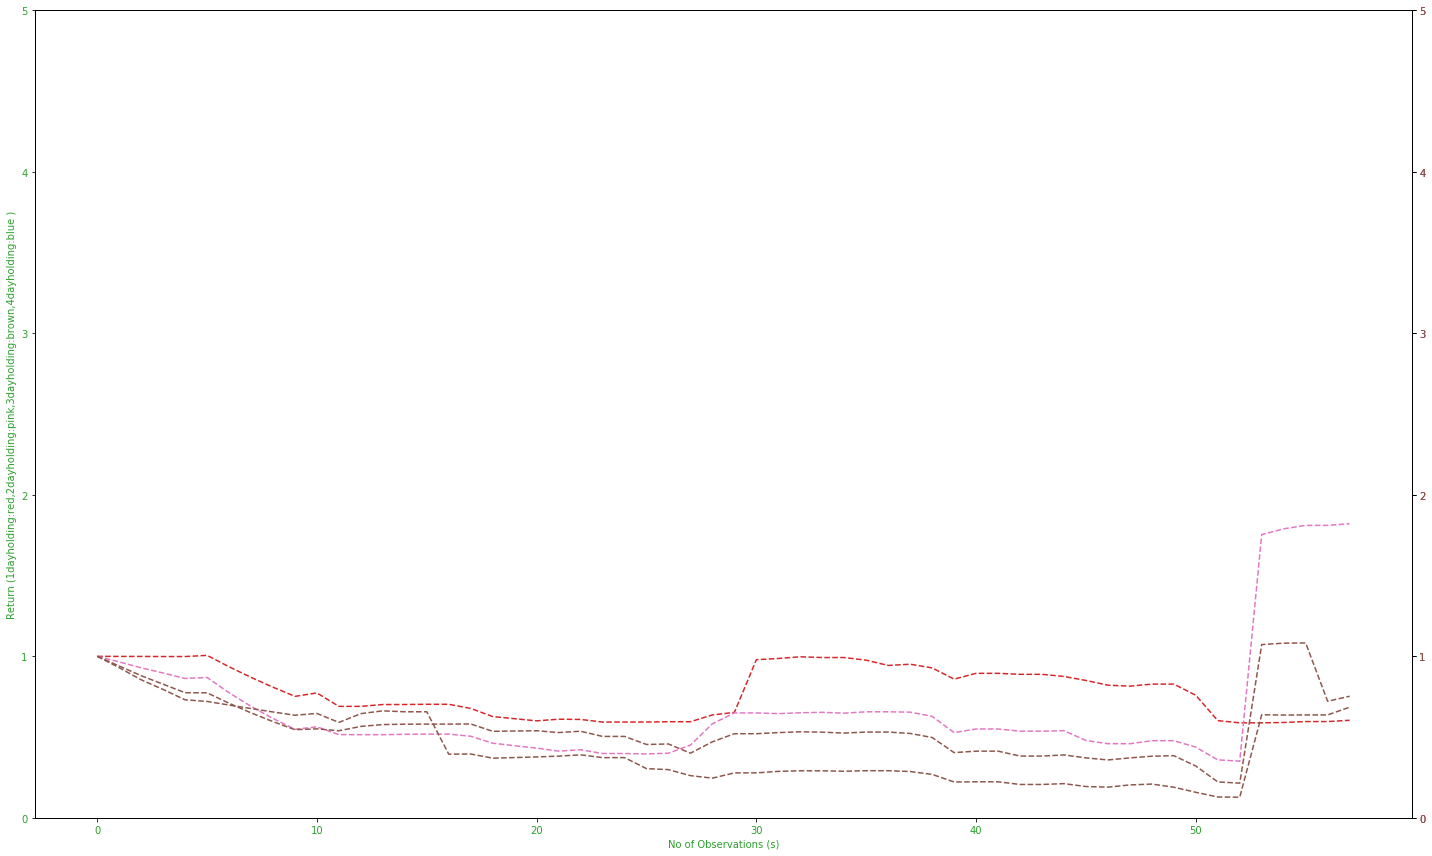

In [29]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)


fig.tight_layout()

**Short Portfolio**

In [16]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='prof-1.0',ascending=False).reset_index()

In [17]:
#hide_input
df_short['indexx']=range(len(df_short))

In [18]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

In [19]:
#hide_input
df_short.head()

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx


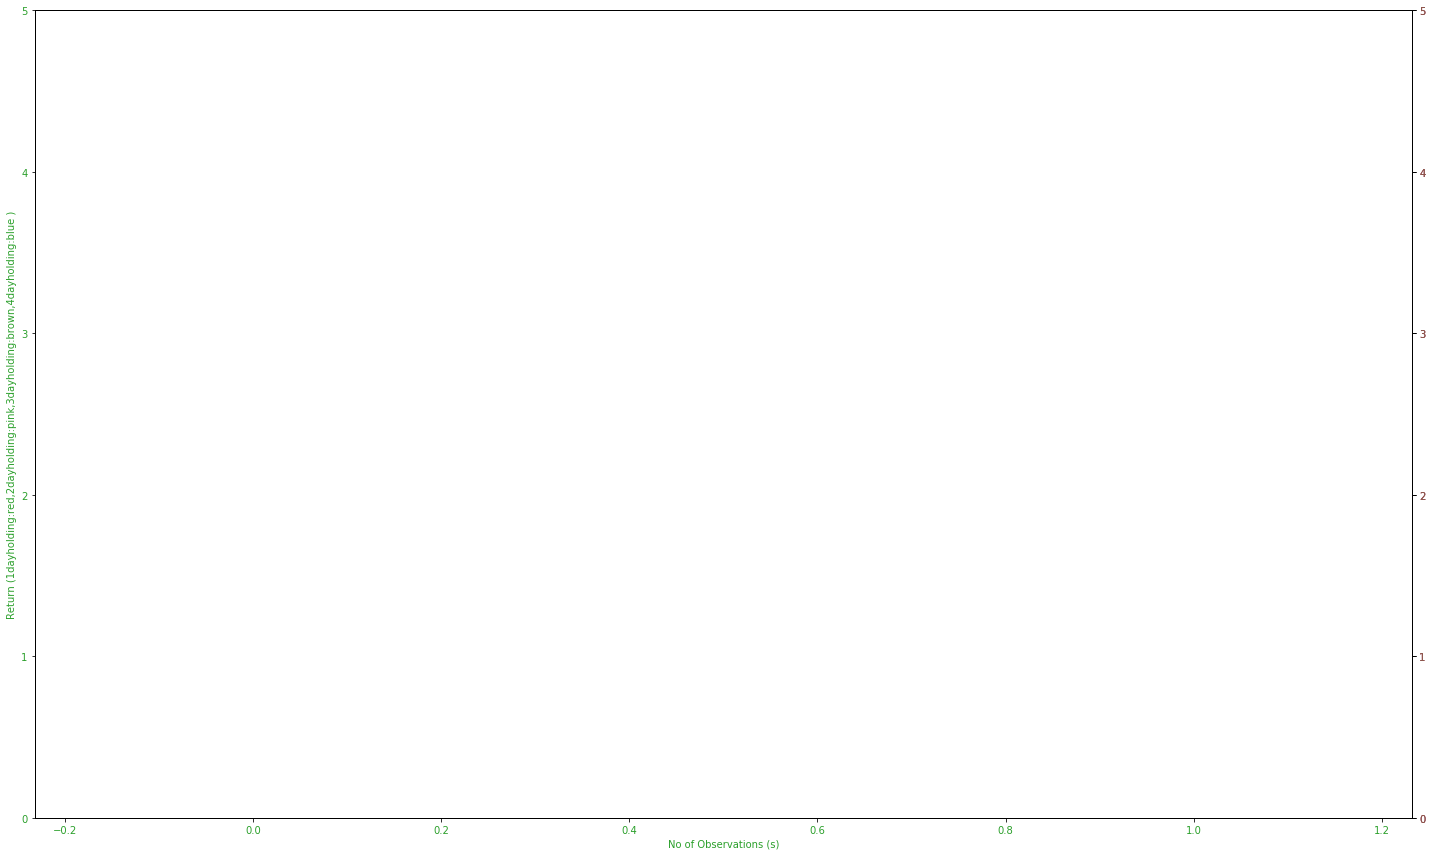

In [28]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)


fig.tight_layout()